[INFO] Found 6 Faces!


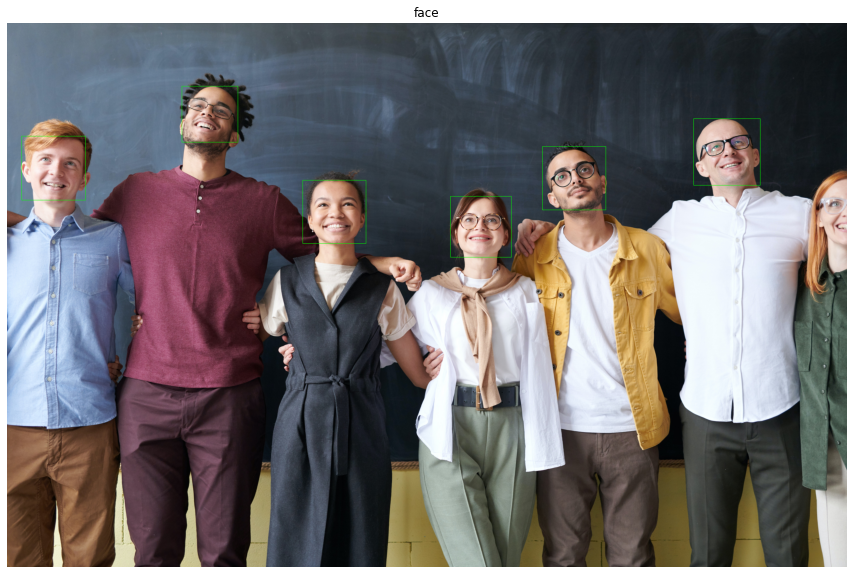

In [54]:
import cv2
import matplotlib.pyplot as plt

imagePath = "image1.jpg"

image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=3,
    minSize=(350, 350)
)

print("[INFO] Found {0} Faces!".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    

plt.figure(figsize=(20,10))
plt.title("face")
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [55]:
selectedFaces = []

for (x, y, w, h) in faces:
    selectedFaces.append(image[int(y):int(y+h), int(x):int(x+w)])

In [49]:
import math
import numpy as np
def Trnsformation(image):
    for (x, y ,w, h) in faces:
        face = image[y: y + h, x: x + w]
        img_output = np.zeros(face.shape)
        for i in range(w):
            for j in range(h):
                offset_x = int(math.sin(i * 0.22) * 10)
                offset_y = int(math.cos(j * 0.44) * 20)
                if j + offset_x < h:
                    img_output[i, j] = image[i, (j + offset_x) % w]
                else:
                    img_output[i, j] = 0
        img = image
        img[y: y+h, x: x+w] = img_output
                
    return img

In [ ]:
plt.figure(figsize=(20,10))
plt.title("face")
plt.axis('off')
plt.imshow(cv2.cvtColor(Trnsformation(image), cv2.COLOR_BGR2RGB))

In [51]:
def mirror(image):
    for (x, y ,w, h) in faces:
        face = image[y: y + h, x: x + w]
        img_output = np.fliplr(face)
        img = image
        img[y: y+h, x: x+w] = img_output
    return img

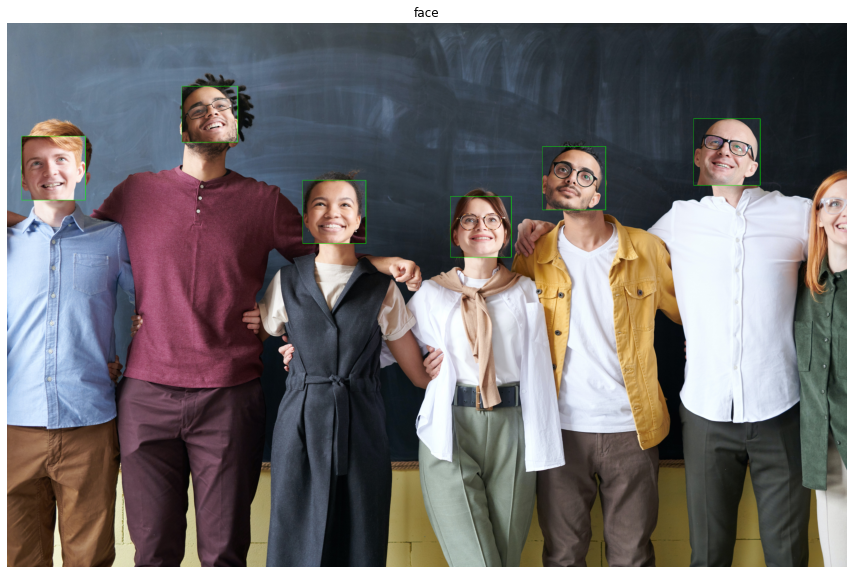

In [56]:
plt.figure(figsize=(20,10))
plt.title("face")
plt.axis('off')
plt.imshow(cv2.cvtColor(mirror(image), cv2.COLOR_BGR2RGB))